In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Project for UTM conversion (Universal Traverse Mercator Projection) https://github.com/Turbo87/utm
import utm

pd.set_option('display.max_columns', 500)

In [45]:
#trips_raw = pd.read_csv('202209-bluebikes-tripdata.csv', header=0)
salem_demand_raw = pd.read_csv('inputs/salem_demand.csv')
salem_demand_raw.columns = [c.replace(' ', '_') for c in salem_demand_raw.columns]
salem_demand_df = salem_demand_raw.drop(columns = ['Unnamed:_0'])

In [46]:
salem_demand_df

,station_id,Number,Name,Latitude,Longitude,Total_docks,count,demand
0,516,T32001,Salem Ferry Landing,42.521893,-70.880691,11,1125,102.272727
1,517,T32002,Salem Willows Park,42.534669,-70.870214,15,2002,133.466667
2,518,T32003,Shetland Park - Congress at Peabody St,42.518368,-70.889524,11,1699,154.454545
3,519,T32004,Mayor Salvo Path at Mill St,42.518035,-70.895701,11,2664,242.181818
4,520,T32005,Salem MBTA - Washington at Federal St,42.523452,-70.896111,13,2947,226.692308
5,521,T32006,Lafayette at Leach St,42.511428,-70.891833,11,1114,101.272727
6,562,T32008,Hawthorne Boulevard,42.522371,-70.890333,9,2669,296.555556
7,570,T32009,Salem State University - North Campus,42.503332,-70.891444,11,779,70.818182
8,571,T32010,Forest River Park,42.506395,-70.886930,11,530,48.181818
9,572,T32011,Essex St at Dalton Parkway,42.516223,-70.905535,11,257,23.363636


In [52]:
stations_df = pd.read_csv('data/Stations.csv', header=1)
#stations_df = stations_raw.drop(columns = ['Unnamed: 0'])
stations_df.columns = [c.replace(' ', '_') for c in stations_df.columns]

#stations_df['Name'] = stations_df['Name'].replace(['Linear Park - Mass. Ave. at Cameron Ave.'], 'Linear Park - Mass. Ave. at Cameron Ave. ')

#name_replacers = {'Linear Park - Mass. Ave. at Cameron Ave.':'Linear Park - Mass. Ave. at Cameron Ave. ',
#                 'Graham and Parks School ? Linnaean St at Walker St':'Graham and Parks School – Linnaean St at Walker St',
#                 'Union St at Herrick Rd ? Newton Centre Green Line':'Union St at Herrick Rd – Newton Centre Green Line'}
#stations_df['Name'] = stations_df['Name'].replace(name_replacers)


In [53]:
stations_df

,Number,Name,Latitude,Longitude,District,Public,Total_docks,Deployment_Year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020
...,...,...,...,...,...,...,...,...
441,N32005,West Newton,42.349601,-71.226275,Newton,Yes,14,2020
442,A32043,Western Ave at Richardson St,42.361787,-71.143931,Boston,Yes,0,2019
443,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19,2019
444,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23,2018


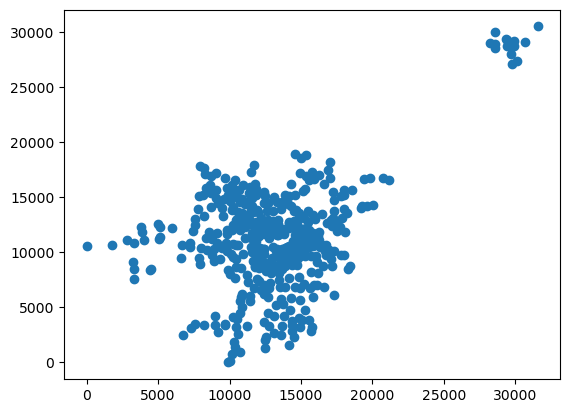

In [61]:
def add_x_y(input_df):
    if "x" in input_df.keys() or "y" in input_df.keys():
        return input_df
    
    def rule(row):
        x, y, zone_number, zone_letter = utm.from_latlon(row["Latitude"], row["Longitude"])
        return pd.Series({"x": x, "y": y, "zone_number": zone_number, "zone_letter": zone_letter})
    output_df = input_df.merge(input_df.apply(rule, axis=1), left_index=True, right_index=True)
    
    def rule2(row):
        xnew, ynew = row["x"]-output_df["x"].min(),row["y"]-output_df["y"].min()
        return pd.Series({"xnew": xnew, "ynew": ynew})
    output_df = output_df.merge(output_df.apply(rule2, axis=1), left_index=True, right_index=True)
    return output_df
    
stations_df = add_x_y(stations_df)
x_list = stations_df["xnew"].values
y_list = stations_df["ynew"].values
plt.scatter(x_list, y_list)
plt.show()

In [59]:
stations_df

,Number,Name,Latitude,Longitude,District,Public,Total_docks,Deployment_Year,x,y,zone_number,zone_letter,xnew,ynew
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021,325810.855859,4.690154e+06,19,T,10951.545234,9812.600219
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021,320842.599964,4.692558e+06,19,T,5983.289340,12217.482920
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014,324671.851630,4.692365e+06,19,T,9812.541006,12024.051960
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018,326395.502325,4.694158e+06,19,T,11536.191700,13817.461590
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020,327280.054903,4.683975e+06,19,T,12420.744279,3634.192590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,N32005,West Newton,42.349601,-71.226275,Newton,Yes,14,2020,316633.496002,4.690994e+06,19,T,1774.185377,10652.647341
442,A32043,Western Ave at Richardson St,42.361787,-71.143931,Boston,Yes,0,2019,323450.159962,4.692173e+06,19,T,8590.849337,11831.582306
443,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19,2019,327632.224059,4.688855e+06,19,T,12772.913435,8513.540453
444,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23,2018,326284.370623,4.685963e+06,19,T,11425.059999,5621.972784


In [55]:
# Plot a map of the stations
fig = px.scatter_mapbox(stations_df, lat="Latitude", lon="Longitude", hover_name="Name", hover_data=["Number", "Total_docks", "Deployment_Year", "District"], color_discrete_sequence=["fuchsia"], zoom=12, height=900)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [59]:
#let's filter down to just cambridge for now
cambridge_stations = stations_df[stations_df.District == "Cambridge"]
cambridge_stations

,Number,Name,Latitude,Longitude,District,Public,Total_docks,Deployment_Year,x,y,zone_number,zone_letter,xnew,ynew
6,M32026,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,Cambridge,Yes,23,2013.0,326729.433011,4.693092e+06,19,T,11870.122387,12751.363501
10,M32054,699 Mt Auburn St,42.375002,-71.148716,Cambridge,Yes,25,2018.0,323093.205093,4.693650e+06,19,T,8233.894468,13308.964079
13,M32060,700 Huron Ave,42.380788,-71.154129,Cambridge,Yes,19,2018.0,322663.833283,4.694304e+06,19,T,7804.522659,13962.725687
14,M32064,75 Binney St,42.365507,-71.080138,Cambridge,Yes,19,2019.0,328713.798515,4.692455e+06,19,T,13854.487890,12114.101714
15,M32058,84 Cambridgepark Dr,42.393600,-71.143941,Cambridge,Yes,27,2018.0,323538.481986,4.695705e+06,19,T,8679.171362,15364.181862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,M32069,Smith Pl at Wilson Rd,42.392397,-71.150583,Cambridge,Yes,19,2020.0,322988.367546,4.695585e+06,19,T,8129.056922,15244.471827
391,M32048,Third at Binney,42.365445,-71.082771,Cambridge,Yes,15,2016.0,328496.741251,4.692453e+06,19,T,13637.430627,12112.481078
405,M32040,University Park,42.362648,-71.100061,Cambridge,Yes,19,2015.0,327065.322993,4.692178e+06,19,T,12206.012368,11836.922051
409,M32057,Vassal Lane at Tobin/VLUS,42.385368,-71.137757,Cambridge,Yes,19,2018.0,324024.509647,4.694778e+06,19,T,9165.199023,14437.202597


In [56]:
# Plot a map of the cambridge stations
fig = px.scatter_mapbox(cambridge_stations, lat="Latitude", lon="Longitude", hover_name="Name", hover_data=["Number", "Total_docks", "Deployment_Year", "District"], color_discrete_sequence=["fuchsia"], zoom=12, height=900)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'cambridge_stations' is not defined

In [62]:
#get euclidean distances between stations

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

trips_df['Eucl'] = [haversine(trips_df.start_station_longitude[i],trips_df.start_station_latitude[i],trips_df.end_station_longitude[i],trips_df.end_station_latitude[i]) for i in range(len(trips_df))]


AttributeError: 'DataFrame' object has no attribute 'start_station_longitude'

In [ ]:
#maybe we don't need this

merged_start = pd.merge(trips_df, stations_df, 
                        left_on="start_station_name",
                        right_on="Name",
                        how="left")

dict_start = {'District': 'Start_District',
              'Total_docks': 'Start_Total docks',
              'Number': 'Start_Number',
             'Deployment_Year':'Start_Deployment_Year',
             'Public':'Start_Public'}
 
merged_start.rename(columns=dict_start,inplace=True)

merged_start_df = merged_start.drop(columns = ['Name','Latitude','Longitude'])

merged_end = pd.merge(merged_start_df, stations_df,
                     left_on="end_station_name",
                     right_on="Name",
                     how="left")

dict_end = {'District':'End_District',
           'Total_docks':'End_Total docks',
           'Number':'End_Number',
           'Deployment_Year':'End_Deployment_Year',
           'Public':'End_Public'}

merged_end.rename(columns=dict_end, inplace=True)

merged_end_df = merged_end.drop(columns = ['Name','Latitude','Longitude','Start_Deployment_Year','End_Deployment_Year'])

merged_end_df #601,049 rows

merged_df = merged_end_df.dropna() #599899 rows

#natest = merged_end_df.drop(columns = ['Start_Deployment_Year'])

#natest = natest[natest.isna().any(axis=1)]

merged_df

In [ ]:
stations_df[stations_df.District == "Cambridge"]

In [28]:
stations_df[stations_df.District == "Salem"]

,Number,Name,Latitude,Longitude,District,Public,Total_docks,Deployment_Year,x,y,xnew,ynew
132,T32013,Community Life Center,42.520136,-70.906271,Salem,Yes,9,2022.0,343416.800817,4.709290e+06,28557.490192,28948.778483
167,T32011,Essex St at Dalton Parkway,42.516223,-70.905535,Salem,Yes,11,2022.0,343467.488614,4.708854e+06,28608.177989,28512.902279
176,T32010,Forest River Park,42.506395,-70.886930,Salem,Yes,11,2022.0,344971.572526,4.707728e+06,30112.261901,27387.364540
190,T32014,Goodhue St at Grove St,42.520897,-70.910528,Salem,Yes,11,2022.0,343069.019881,4.709382e+06,28209.709256,29041.158023
215,T32008,Hawthorne Boulevard,42.522371,-70.890333,Salem,Yes,9,2022.0,344731.536647,4.709509e+06,29872.226023,29167.680582
242,T32006,Lafayette at Leach St,42.511428,-70.891833,Salem,Yes,11,2021.0,344581.206188,4.708296e+06,29721.895563,27955.210664
274,T32004,Mayor Salvo Path at Mill St,42.518035,-70.895701,Salem,Yes,11,2021.0,344279.862496,4.709037e+06,29420.551871,28696.019426
343,T32001,Salem Ferry Landing,42.521893,-70.880691,Salem,Yes,11,2021.0,345522.357606,4.709438e+06,30663.046981,29096.917117
344,T32012,Salem MBTA - Lower Level,42.523994,-70.896840,Salem,Yes,11,2022.0,344201.087965,4.709701e+06,29341.777341,29359.804453
345,T32005,Salem MBTA - Washington at Federal St,42.523452,-70.896111,Salem,Yes,13,2021.0,344259.610632,4.709639e+06,29400.300007,29298.321831


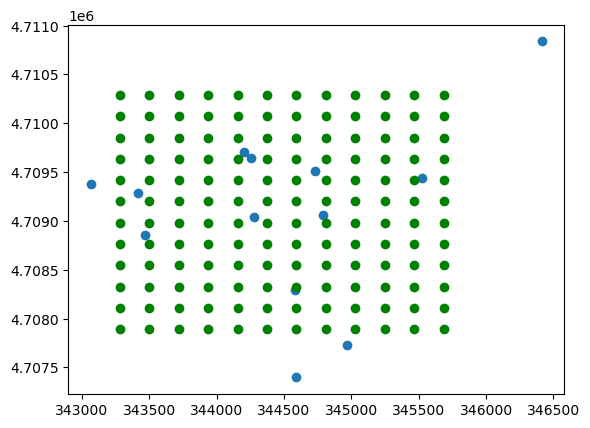

In [63]:
#create grid of potential new stations

salemCenter = stations_df[stations_df.District == "Salem"][['x','y']].mean().values
GRID_DIM = 12
SCALE_X = 1200
SCALE_Y = 1200
x_vals = np.linspace(-SCALE_X, SCALE_X, GRID_DIM)
y_vals = np.linspace(-SCALE_Y, SCALE_Y, GRID_DIM)
xx, yy = np.meshgrid(x_vals, y_vals)
xx, yy = xx.flatten().tolist(), yy.flatten().tolist()
points = list(zip(xx, yy))
points = np.array(points).reshape(-1, 2)
points

salemCenter + points
    
grid = salemCenter + points
x_list = stations_df[stations_df.District == "Salem"]["x"].values
y_list = stations_df[stations_df.District == "Salem"]["y"].values
plt.scatter(x_list, y_list)
plt.scatter(grid[:,0],grid[:,1],c="green")
plt.show()

In [65]:
#get lat,lon of potential stations
lats = []
lons = []
names = []
colors = []
xcoord = []
ycoord = []
zone_number = stations_df.iloc[0]['zone_number']
zone_letter = stations_df.iloc[0]['zone_letter']
for p in grid:
    lat, lon = utm.to_latlon(p[0], p[1], zone_number, zone_letter)
    lats.append(lat)
    lons.append(lon)
    names.append("grid")
    colors.append("green")
    xcoord.append(p[0])
    ycoord.append(p[1])

grid_df = pd.DataFrame(data={
    "Latitude": lats,
    "Longitude": lons,
    "Name": names,
    "x": xcoord,
    "y": ycoord,
    "Colors": colors,
})
grid_df
grid_df["Size"] = 0.5

In [66]:
#plot attractions with values for report
fig = px.scatter_mapbox(grid_df, lat="Latitude", lon="Longitude", color_discrete_sequence=["grey"], zoom=12, height=900, size=grid_df["Size"], size_max=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [117]:
#write csv of grid (potential stations)
new_stations_df = grid_df.drop(columns = ['Name','Colors','x','y'])

new_stations_df['index'] = np.arange(len(new_stations_df))

new_stations_df.to_csv('new_stations_df')

In [ ]:
#lets look at how much trip data we have for Salem

merged_df[merged_df.Start_District == "Salem"] #2401 trips starting from Salem
merged_df[merged_df.End_District == "Salem"] #2407 trips ending in Salem

In [82]:
#import real time data for bike station utilization
utilization_raw = pd.read_csv('bluebikes_free.csv', header=0)
utilization_raw

utilization_df = utilization_raw[(utilization_raw.is_installed == 1) & 
                                 (utilization_raw.is_renting == 1) &
                                (utilization_raw.is_returning == 1) &
                                (utilization_raw.station_status == 'active')]
#utilization_df = utilization_df.drop(columns = ['is_installed','is_renting','is_returning','station_status'])
utilization_df = utilization_df[['num_bikes_available','station_id','num_docks_available']]
utilization_df


,is_installed,is_renting,num_bikes_disabled,num_ebikes_available,num_bikes_available,station_id,num_docks_disabled,num_docks_available,is_returning,station_status,eightd_has_available_keys,last_reported,legacy_id
0,1,1,1,0,5,3,0,9,1,active,False,1667537239,3
1,1,1,5,0,13,4,0,1,1,active,False,1667537364,4
2,1,1,1,0,0,5,0,14,1,active,False,1667538094,5
3,1,0,0,0,9,6,0,6,0,active,False,1667531392,6
4,1,1,0,0,0,7,0,15,1,active,False,1667526449,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,1,0,0,12,583,0,7,1,active,False,1667531573,583
446,1,1,0,0,4,584,0,7,1,active,False,1667529128,584
447,1,1,0,0,1,585,0,10,1,active,False,1667514876,585
448,1,1,0,0,13,586,0,1,1,active,False,1667530085,586


In [17]:
station_info_raw = pd.read_csv('bluebikes.csv',header=0)
station_info_raw

#join with utilization data
merged_station_info = pd.merge(utilization_df, station_info_raw, 
                        left_on="station_id",
                        right_on="station_id",
                        how="inner")
merged_station_info

#join with stations data
merged_stations = pd.merge(merged_station_info, stations_df,
                          left_on="short_name",
                          right_on="Number",
                          how="inner")

merged_stations = merged_stations.drop(columns = ['lon','lat','has_kiosk','electric_bike_surcharge_waiver','eightd_station_services','rental_methods','external_id','eightd_has_key_dispenser'])

#add availability column
merged_stations['bike_availability'] = merged_stations['num_bikes_available']/merged_stations['capacity']
merged_stations


NameError: name 'utilization_df' is not defined

In [109]:
#utilization from trip histories data

start_stations = pd.DataFrame().assign(station_id = trips_df['start_station_id'])

end_stations = pd.DataFrame().assign(station_id = trips_df['end_station_id'])

start_end_stations = pd.concat([start_stations,end_stations])

#get counts of station uses
station_counts = start_end_stations.groupby(['station_id'])['station_id'].count().reset_index(name="count")

#load station info data
station_info_raw = pd.read_csv('bluebikes.csv',header=0)

station_info = pd.DataFrame().assign(station_id = station_info_raw['station_id'], capacity = station_info_raw['capacity'], station_key = station_info_raw['short_name'])

#merge station capacity data with station count data
stations_count_cap_m = pd.merge(station_counts, station_info,
        left_on="station_id",
        right_on="station_id",
        how="left")

stations_count_cap = stations_count_cap_m.dropna()

stations_demand = stations_count_cap.assign(demand = stations_count_cap['count']/stations_count_cap['capacity'])
stations_demand

#write to csv
#stations_demand.to_csv('stations_demand_df')

,station_id,count,capacity,station_key,demand
1,3,3759,15.0,B32006,250.600000
2,4,4612,19.0,C32000,242.736842
3,5,6931,15.0,B32012,462.066667
4,6,5949,15.0,D32000,396.600000
5,7,2270,15.0,A32000,151.333333
...,...,...,...,...,...
436,576,49,11.0,F32001,4.454545
437,577,66,11.0,F32002,6.000000
438,578,134,11.0,F32003,12.181818
439,582,310,19.0,M32081,16.315789


In [127]:
# join salem station grid data with demand

salem_stations
salem_df = pd.merge(salem_stations, stations_demand,
        left_on="Number",
        right_on="station_key",
        how="left")

salem_df.drop(columns=['x','y','Colors','Number'])
salem_df.to_csv('salem_df')

Post Optimization Plotting

In [ ]:
candidates_df = pd.read_csv('inputs/candidate_address.csv', header=0)
salem_demand_df = pd.read_csv('inputs/salem_demand.csv', header=0)

split = candidates_df["Coordinates"].str.split(",", n = 1, expand = True)
candidates_df["Latitude"]= split[0]
candidates_df["Longitude"]= split[1]
candidates_df["Latitude"] = candidates_df['Latitude'].str[1:].astype(np.float64)
candidates_df["Longitude"] = candidates_df['Longitude'].str[:-1].astype(np.float64)
#candidates_df["Latitude"] = candidates_df['Latitude'].astype(np.float64)
#candidates_df['Longitude'].astype(np.float64)

salem_stations = stations_df[stations_df.District == "Salem"][['Latitude','Longitude','Name','Number','x','y']]
#salem_stations['Colors'] = ["fuchsia" for _ in range(len(salem_stations))]
salem_demand_df['Colors'] = ["fuchsia" for _ in range(len(salem_demand_df))]

candidates_df['index'] = np.arange(len(candidates_df))
stations_chosen = (5,17,54,69,126)
candidates_df['Colors'] = np.where(candidates_df['index'].isin(stations_chosen), "darkgreen", "black")

# Plot a map of the potential stations
fig = px.scatter_mapbox(pd.concat([candidates_df,salem_demand_df]), lat="Latitude", lon="Longitude", hover_name = "demand", color="Colors", zoom=12, height=900)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#ideas
#plot lines for top 10-50 most travelled paths
#plot bigger dot size for more traveled stations
#unmet demand: utilization for each station - this goes in the objective function
##node = station: how many bikes left station (demand) how many bikes entered station (supply)
### how often there are 0 bikes left, how many bikes remaining/total bikes
### at each hour on the hour, how many bikes our available/total bikes? average over time to get utilization
#unmet demand: population data?

#convexity???

#cost to penalize stations far away - use centroid